<a href="https://colab.research.google.com/github/hanselkane/Other/blob/main/(Multivariate)_Data_Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do We Really Need Deep Learning Models for Time Series Forecasting? 
Shereen Elsayed, Daniela Thyssens, Ahmed Rashed, Hadi Samer Jomaa, Lars Schmidt-Thieme (20 Oct 2021)

Why did I chose the paper ?

It's because I've heard that in this project I will be dealing with XGBoost as the main model with air quality forecast as the topic. The paper must not be too complicated and the source code must be freely accessible since limited time were provided.

Advantages: A simpler tree-based model could outperform deep learning models in some cases, uses less memory and generally trains faster than deep learning models.

Disadvantages: In my opinion, if the data pattern is not very complicated, then simpler-model like this would suffice. But in the case of a very complicated data with many features affecting each other, models with greater capacity is needed. Also, simpler models tend to require deeper understanding of the data pattern, require more sophisticated feature engineering than deep learning model. DL models have a tendency to just feed all the data to the model and let the machine adjust all of its weights.

In [32]:
import requests
import io

import pandas as pd

%matplotlib inline

# Downloading the csv file from a GitHub account
url = "https://raw.githubusercontent.com/hanselkane/MachineLearning-Telyu/main/Week%201/AirQualityUCI.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';', decimal=',')

In [33]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [34]:
# The spreadsheet has some kind of margin
print(df.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [35]:
# Trim the margins
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
df = df[:9357]

In [36]:
# As per dataset's description, missing values are tagged with -200
import numpy as np
df = df.replace({-200.0: None})

print(df.isnull().sum())

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [37]:
# 366 rows don't have any values at all, drop them
df = df.dropna(subset = ['T'])
print(df.isnull().sum())

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64


<Figure size 360x288 with 0 Axes>

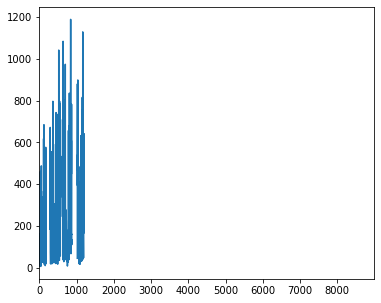

In [38]:
# Decide what to do with the missing values

# Inspect NMHC col
import matplotlib.pyplot as plt
x = []
for i in range(0, len(df.index)):
  x.append(i)

plt.figure().set_figwidth(5)
plt.figure().set_figheight(5)
plt.plot(x, df['NMHC(GT)'])

plt.xlim([0, len(df.index)])
plt.show()

In [39]:
# NMHC(GT) column has so many missing values, drop them
df = df.drop(['NMHC(GT)'], axis=1)

In [40]:
print(df.isnull().sum())

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64


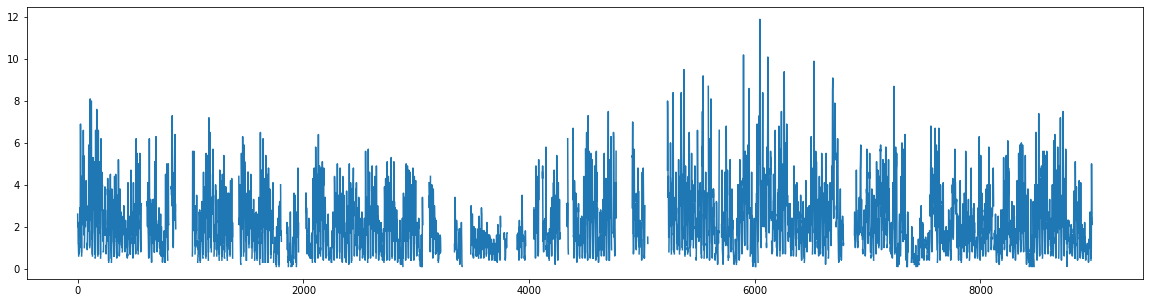

In [41]:
# Inspect CO col
import matplotlib.pyplot as plt
x = []
for i in range(0, len(df.index)):
  x.append(i)

plt.rcParams["figure.figsize"] = (20,5)
plt.plot(x, df['CO(GT)'])
plt.show()

In [42]:
for col in df:
  if(col == 'Date' or col == 'Time'): continue
  df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.interpolate(method ='linear')

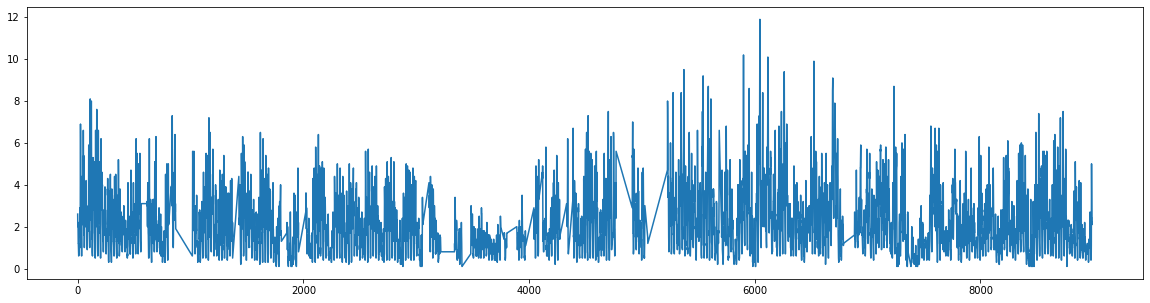

In [43]:
# Inspect CO col
import matplotlib.pyplot as plt
x = []
for i in range(0, len(df.index)):
  x.append(i)

plt.rcParams["figure.figsize"] = (20,5)
plt.plot(x, df['CO(GT)'])
plt.show()

In [44]:
df.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  8991.000000  8991.000000  8991.000000    8991.000000  8991.000000   
mean      2.108625  1099.833166    10.083105     939.153376   237.867145   
std       1.418330   217.080037     7.449820     266.831429   198.509931   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.000000   937.000000     4.400000     734.500000    95.000000   
50%       1.800000  1063.000000     8.200000     909.000000   178.000000   
75%       2.900000  1231.000000    14.000000    1116.000000   322.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   8991.000000  8991.000000   8991.000000  8991.000000  8991.000000   
mean     835.493605   108.662996   1456.264598  1022.906128    18.317829   
std      256.817320    45.738950    346.206794   398.484288     8.832116   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      658.000000    75.000000   1227.000000   731.500000    11.800000   
50%      806.000000   104.000000   1463.000000   963.000000    17.800000   
75%      969.500000   135.000000   1674.000000  1273.500000    24.400000   
max     2683.000000   333.000000   2775.000000  2523.000000    44.600000   

                RH           AH  
count  8991.000000  8991.000000  
mean     49.234201     1.025530  
std      17.316892     0.403813  
min       9.200000     0.184700  
25%      35.800000     0.736800  
50%      49.600000     0.995400  
75%      62.500000     1.313700  
max      88.700000     2.231000

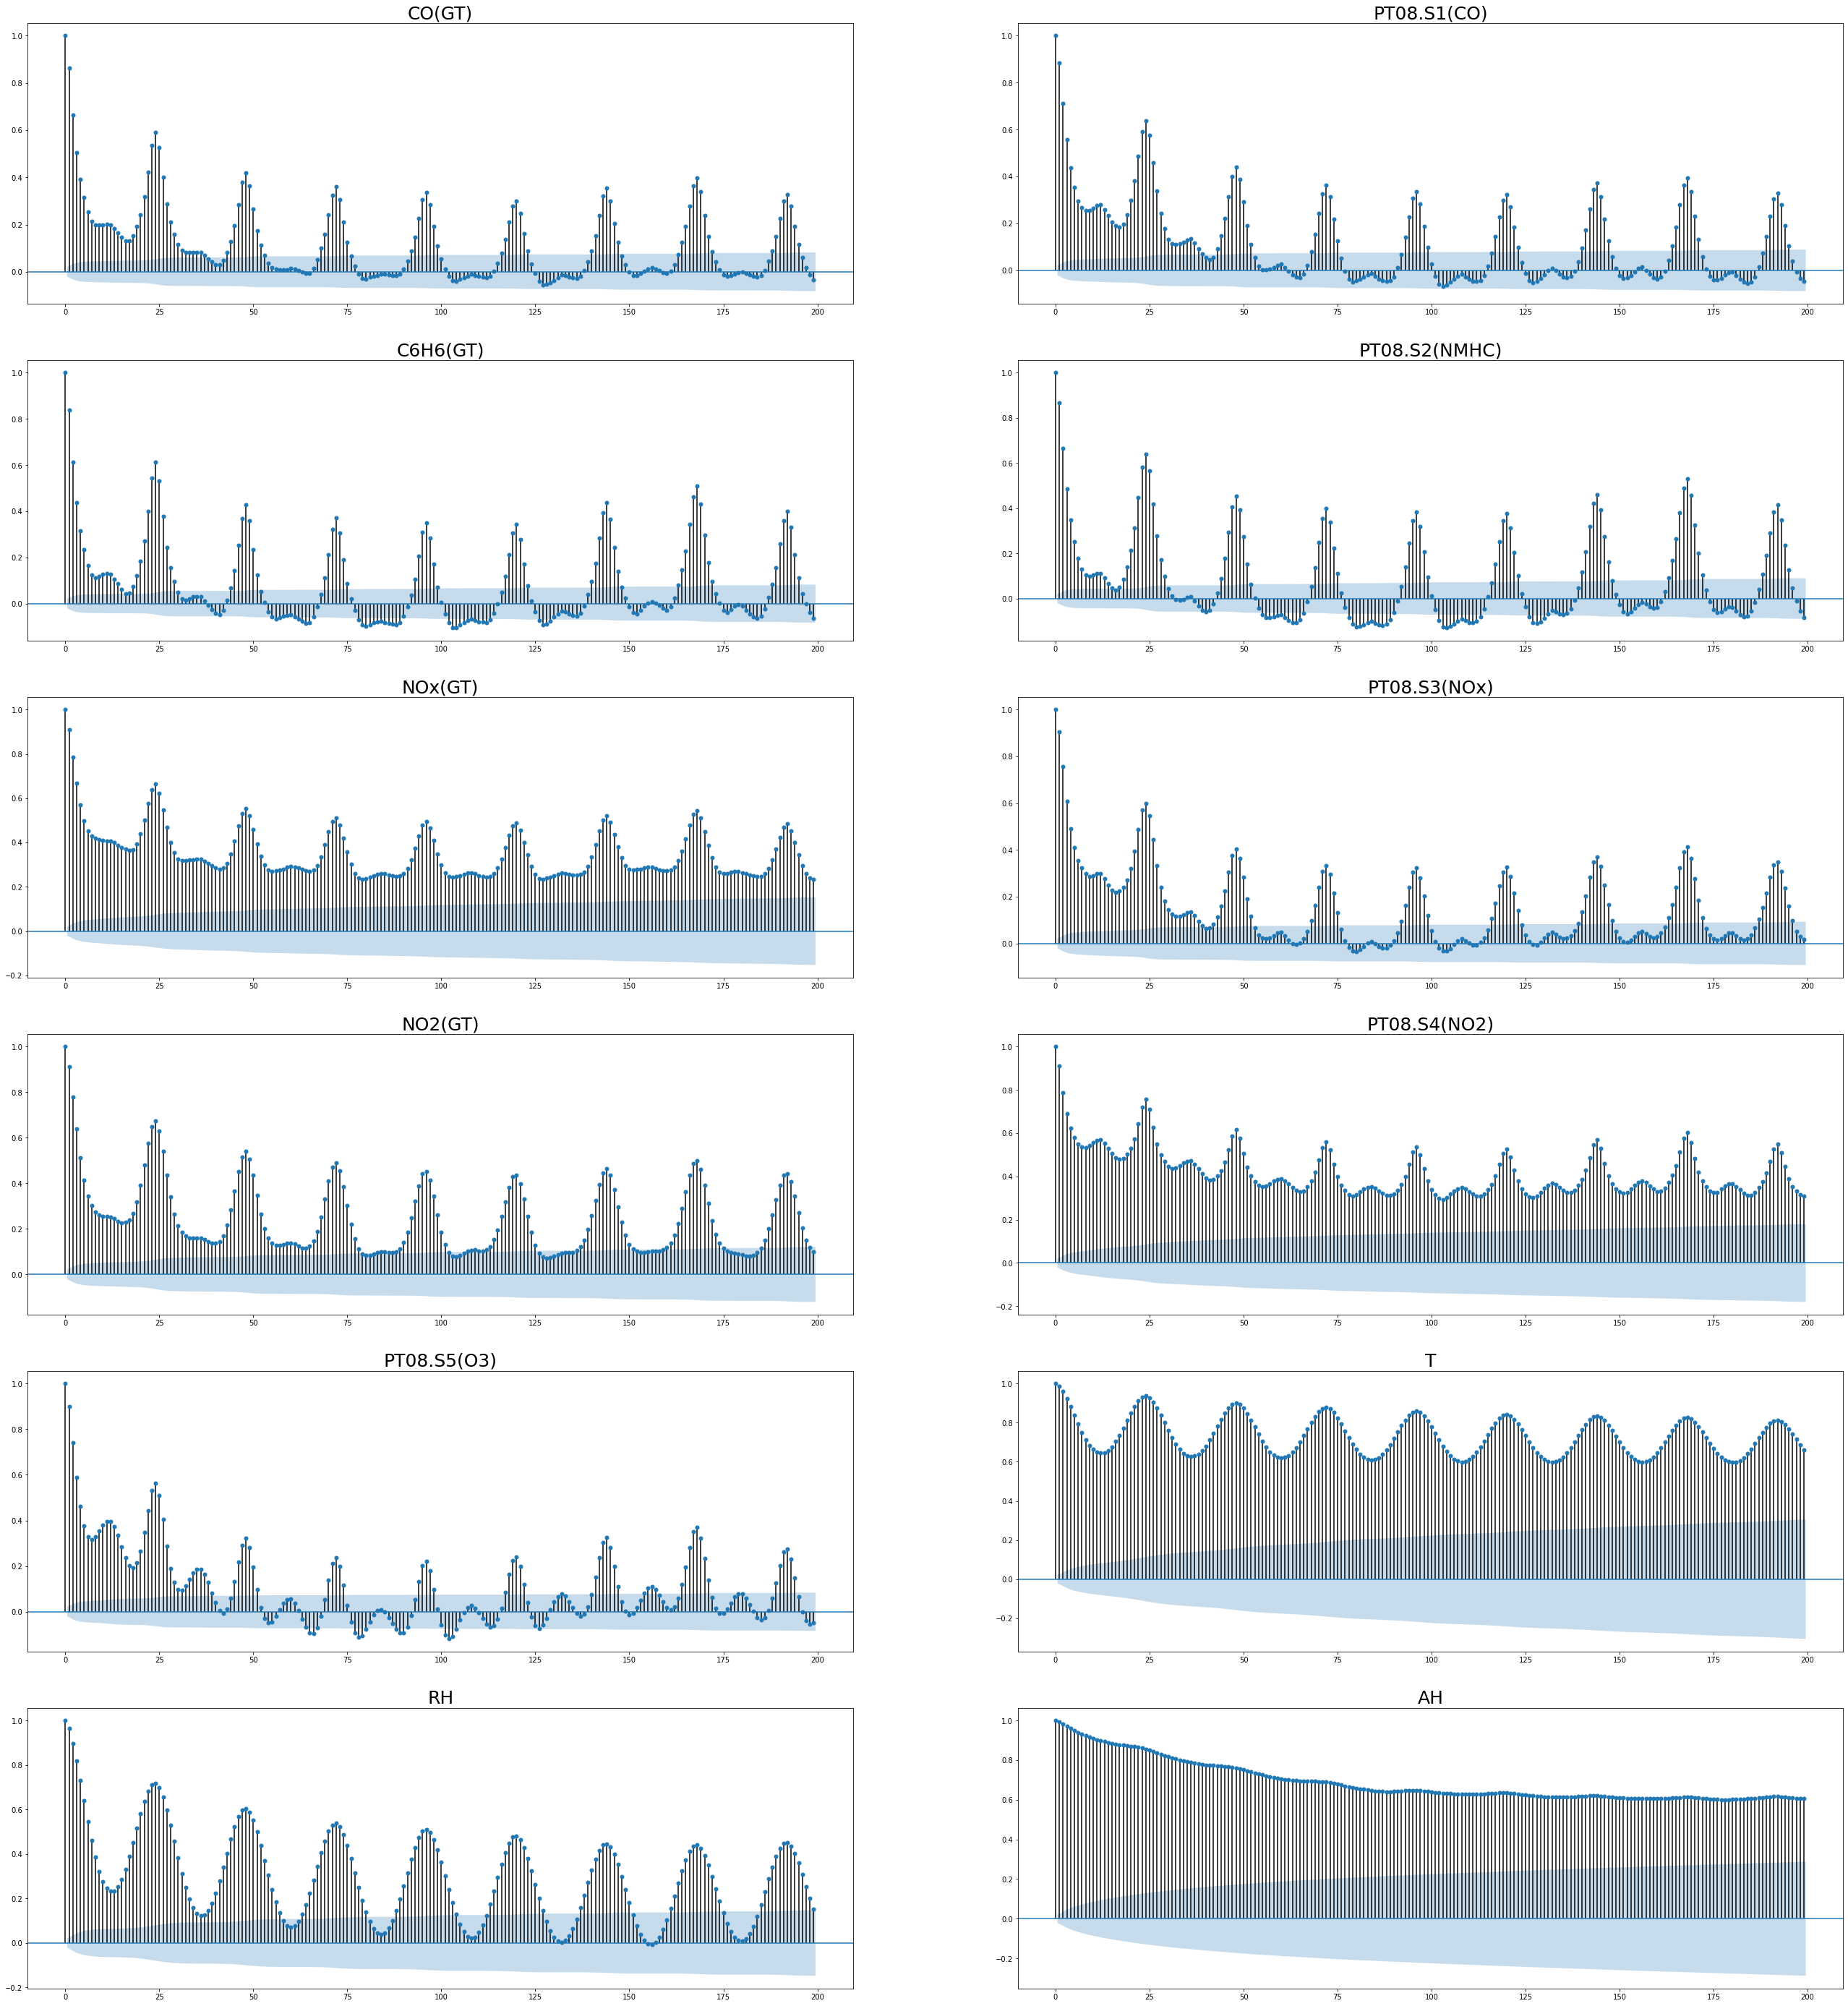

In [46]:
# Find out the autocorrelation

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

lagsInput=np.arange(200)

fig, axs = plt.subplots(6,2,figsize=(45,50))

colGrid = -1
rowGrid = 0

for colNames in df.columns:
  if(colNames == 'Date' or colNames == 'Time'):
    continue

  colGrid += 1
  if(colGrid == 2):
    colGrid = 0
    rowGrid += 1

  plot_acf(df[['Time', colNames]].set_index(['Time']), lags=lagsInput, ax=axs[rowGrid,colGrid])
  axs[rowGrid, colGrid].set_title(colNames, fontsize=25)

In [47]:
# Observe whether time in a day contributes to the distribution of pollutants
import numpy as np

indices = np.where(df['Time'] == '01.00.00')
print(indices[0].size)

# Separate data based on time
listOfDF = []
for i in range(0, 24):
  digitsStr = ""
  if(i<=9):
    digitsStr += '0'
  digitsStr += str(i)
  listOfDF.append(df.loc[df['Time'] == str(digitsStr) + ".00.00"])

374


In [48]:
# Find each columns' mean values
listOfDFMean = []
for i in range(0, 24):
  listOfDFMean.append(listOfDF[i].mean())

<ipython-input-48-43d53e17fdf5>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  listOfDFMean.append(listOfDF[i].mean())


In [49]:
# Create x axis (time)
x = []
for i in range(0, 24):
  digitsStr = ""
  if(i<=9):
    digitsStr += '0'
  digitsStr += str(i)
  x.append(digitsStr)

In [50]:
import matplotlib.pyplot as plt

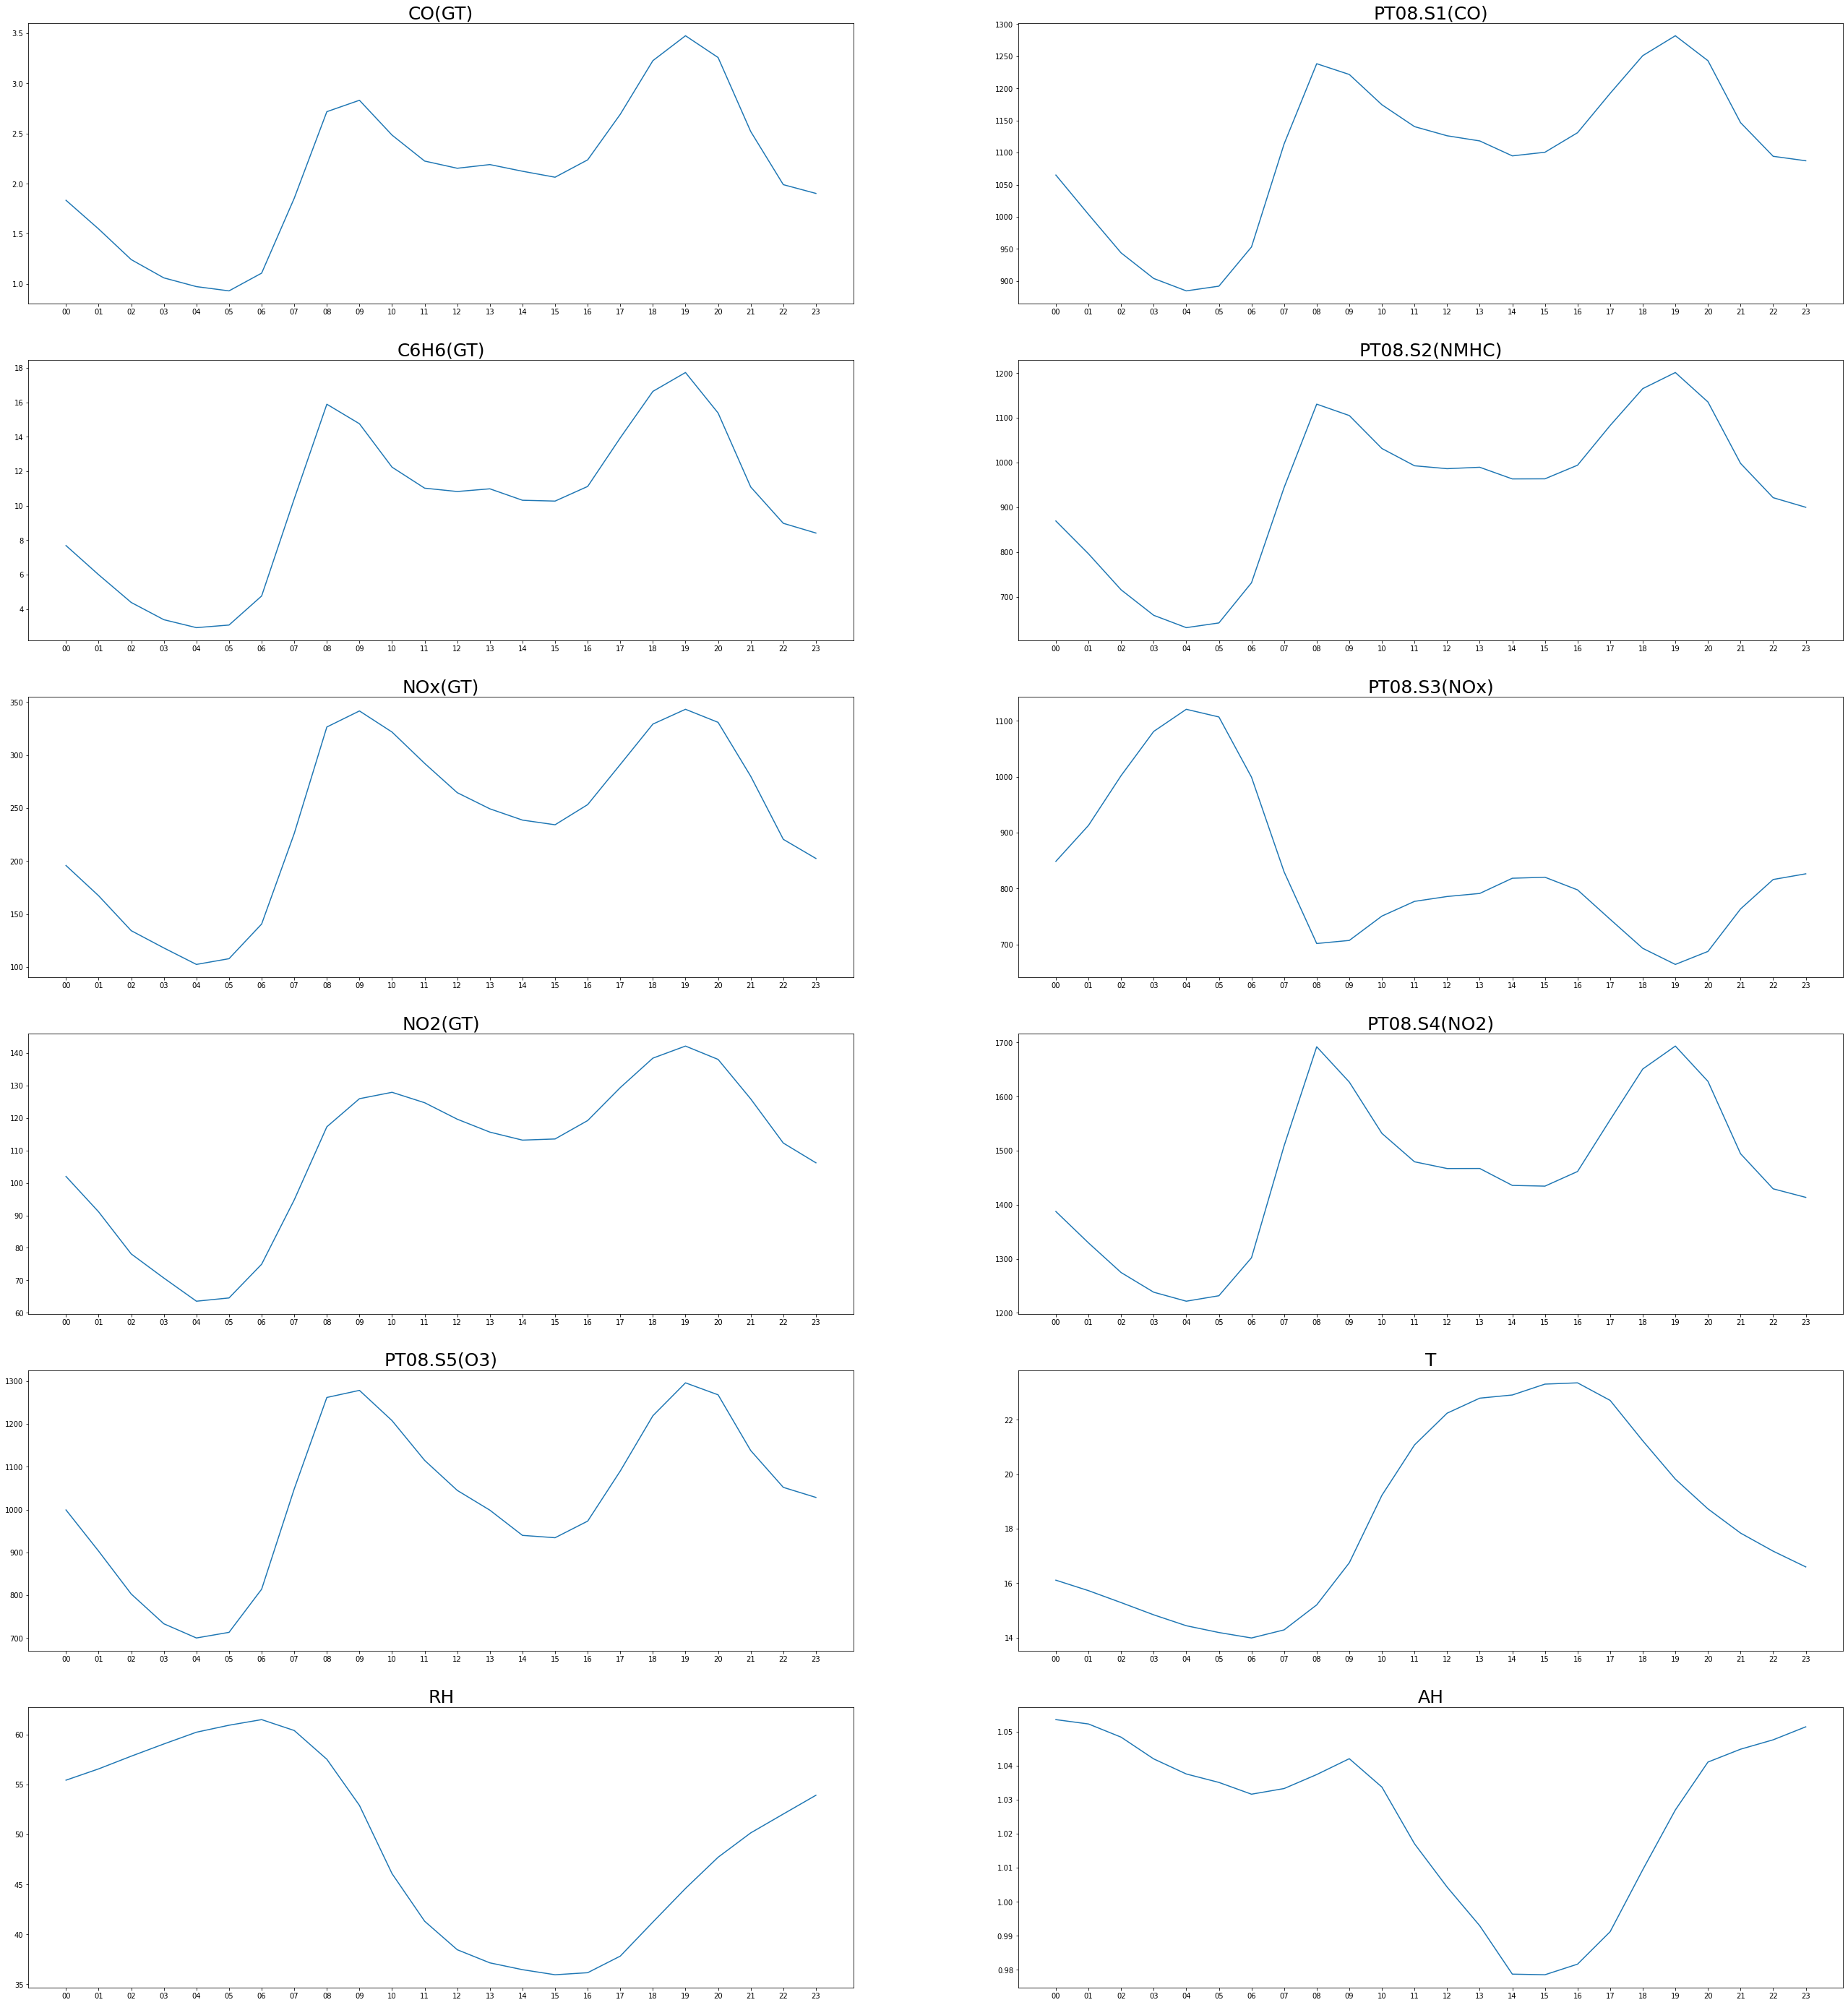

In [51]:
# Is there any correlation between time of the day and pollution ?

# Plot pollutans vs time of a day
fig, axs = plt.subplots(6, 2, figsize=(45,50))

colGrid = -1
rowGrid = 0

for colNames in df.columns:
  if(colNames == 'Date' or colNames == 'Time'):
    continue

  colGrid += 1
  if(colGrid == 2):
    colGrid = 0
    rowGrid += 1

  y = []
  for elDF in listOfDFMean:
    y.append(elDF[colNames])

  axs[rowGrid, colGrid].plot(x, y)
  axs[rowGrid, colGrid].set_title(colNames, fontsize=25)

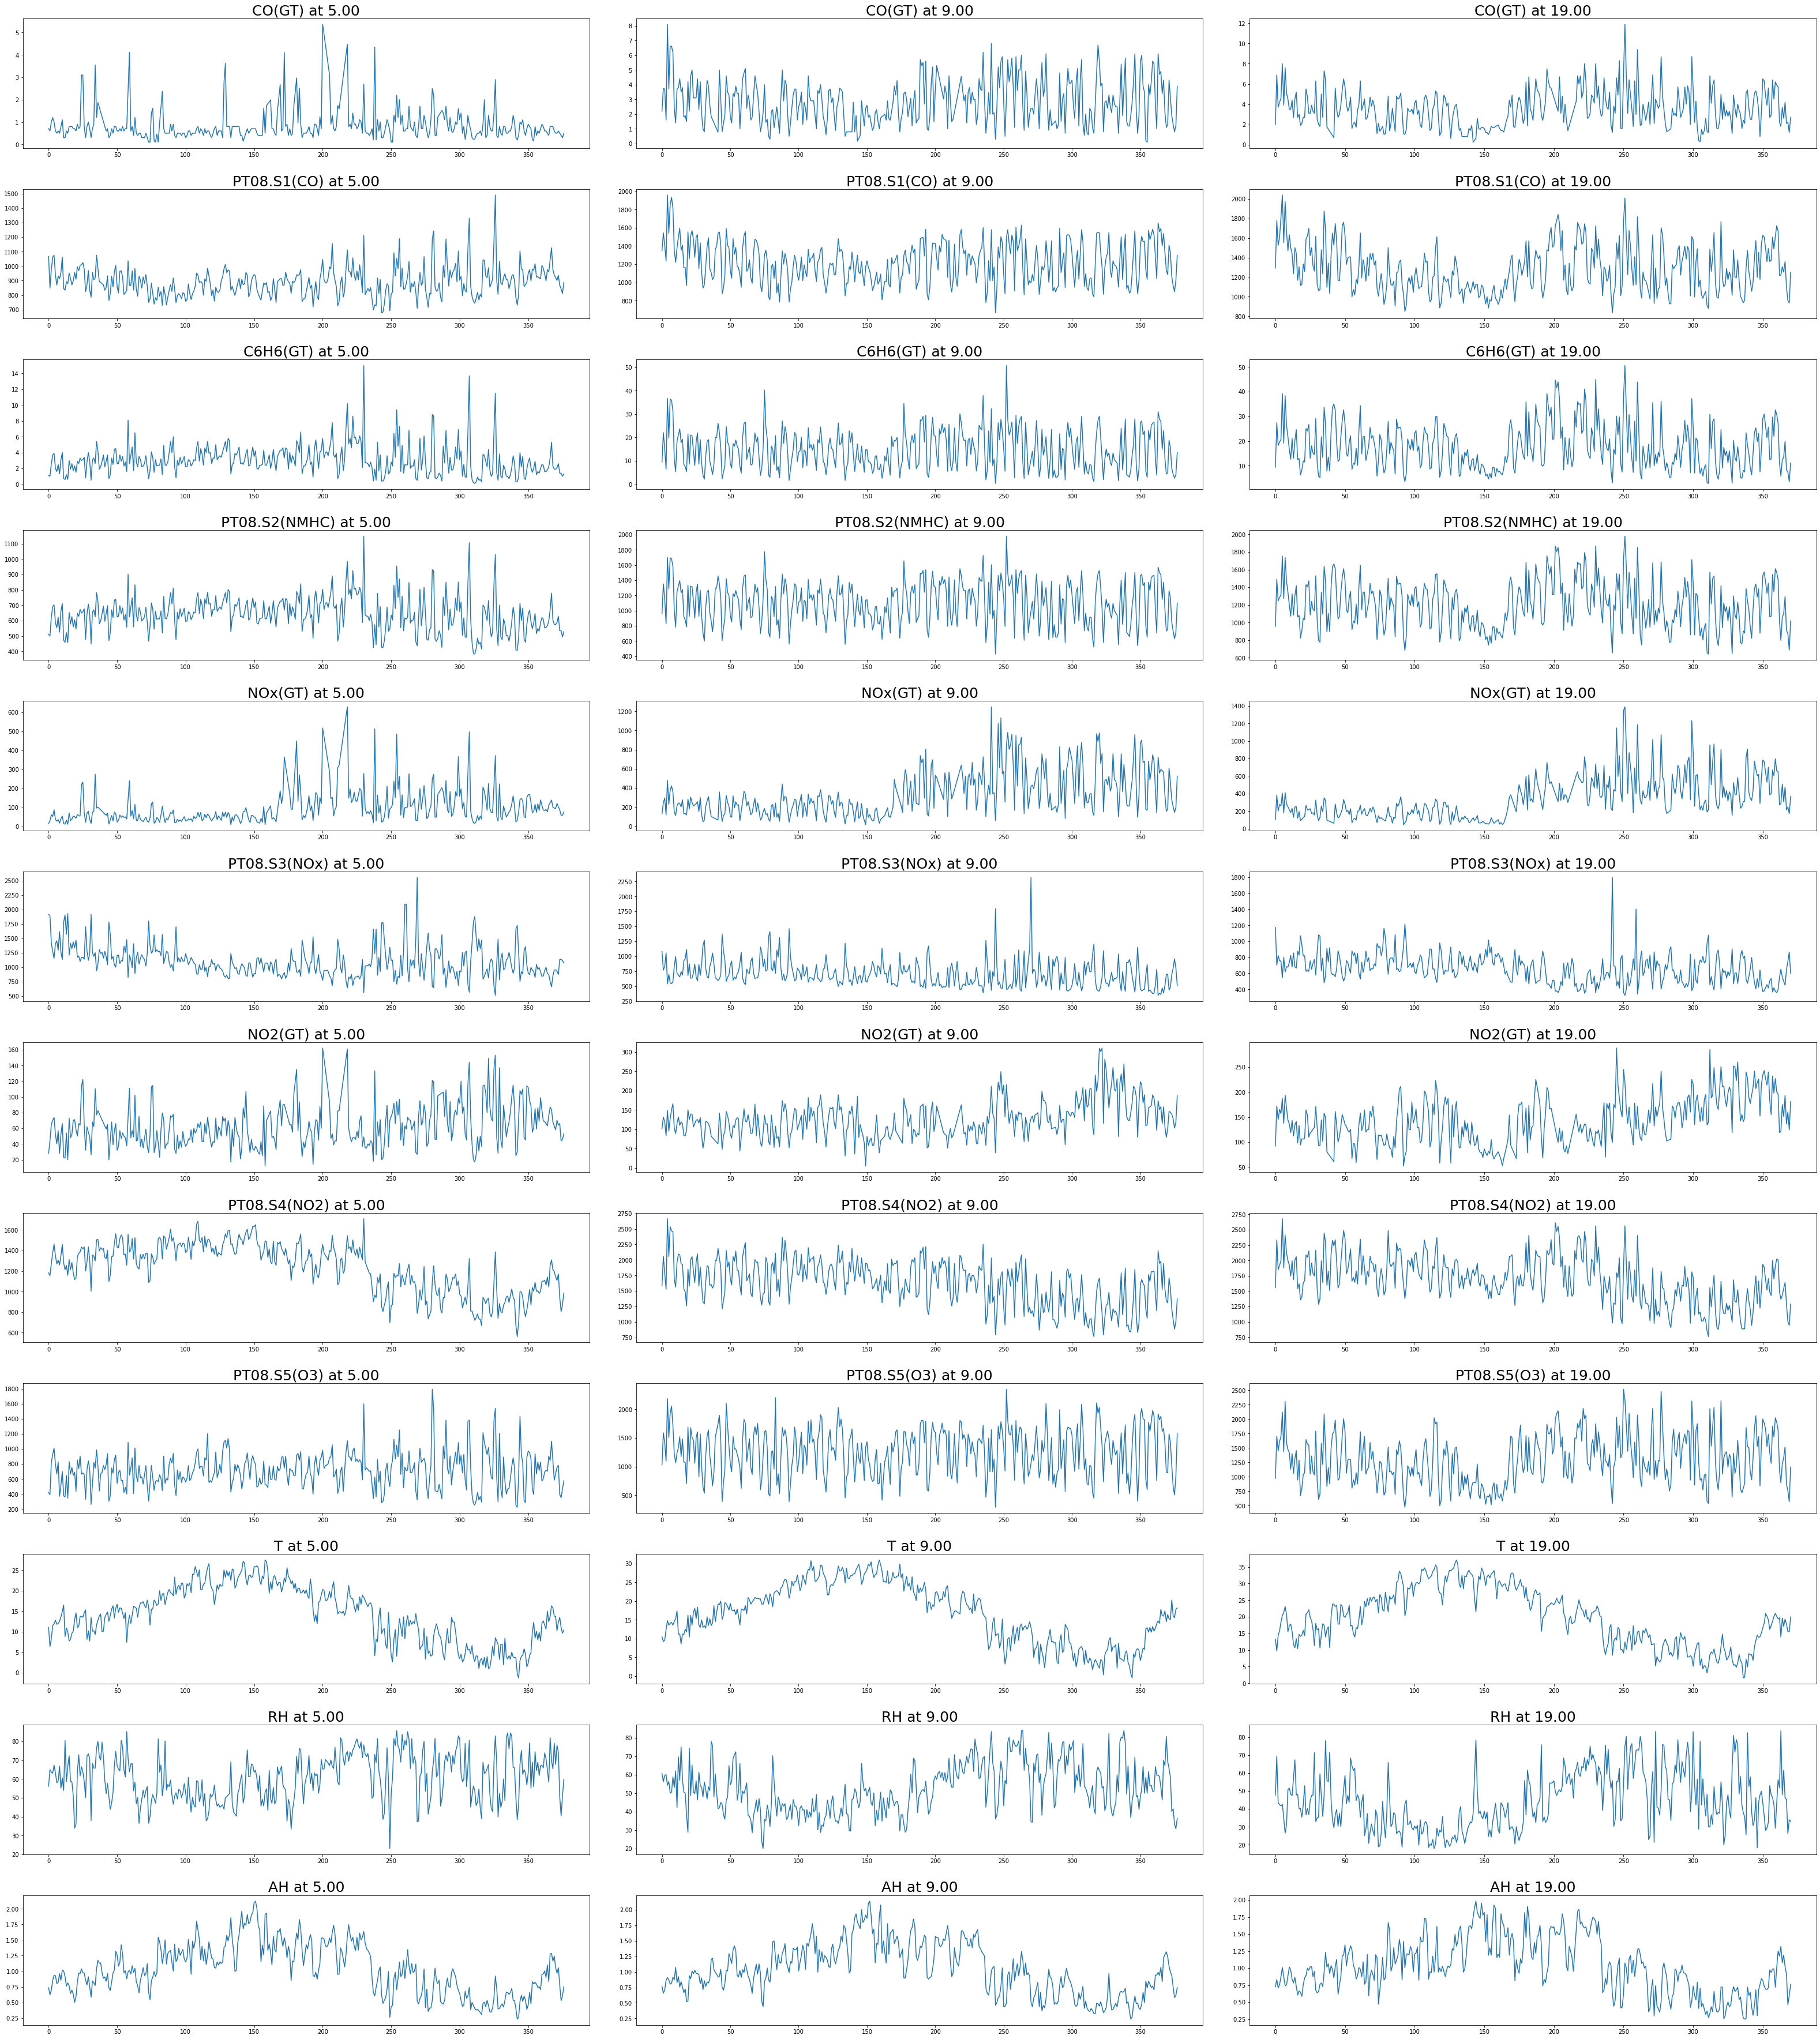

In [52]:
# Is there any daily trends of pollution in a year ?

# Based on the earlier insights, extrema happen at around 05, 19, 09
# Freeze the time at those values, then plot graphs of pollutants values everyday in a year

fig2, axs2 = plt.subplots(12, 3, figsize=(45,50))
fig2.tight_layout(pad=5.0)

colGrid = -1
rowGrid = 0
y2 = []

timeList = [5, 9, 19]

for colNames in df.columns:
  if(colNames == 'Date' or colNames == 'Time'):
    continue
  
  for time in timeList:
    colGrid += 1
    if(colGrid >= 3):
      colGrid = 0
      rowGrid += 1
    mDF = listOfDF[time]
    # print(mDF)
    y2 = mDF[colNames].values
    x2 = np.array([i for i in range(y2.size)])
    axs2[rowGrid, colGrid].plot(x2, y2)
    axs2[rowGrid, colGrid].set_title(colNames + " at " + str(time) + ".00", fontsize=25)

In [53]:
# Which days have the most polluted air if compared to the average ?

import math
dfAverages = df.mean()

resultDF = pd.DataFrame()

for date in df['Date'].unique():
  subDF = df[df['Date'] == date]
  subDF = (subDF.mean() / dfAverages) * 100

  # Find the amount of total pollutants in percent
  sum = 0.0
  index = 0
  for i in range(0, subDF.size-3):
    if(math.isnan(subDF[i])): continue
    sum += subDF[i]
    index += 1
  subDF['Date'] = date
  subDF['Total%'] = sum
  resultDF = resultDF.append(subDF, ignore_index=True)

resultDF = resultDF.sort_values('Total%')

<ipython-input-53-3d2e1b379989>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfAverages = df.mean()
<ipython-input-53-3d2e1b379989>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  subDF = (subDF.mean() / dfAverages) * 100


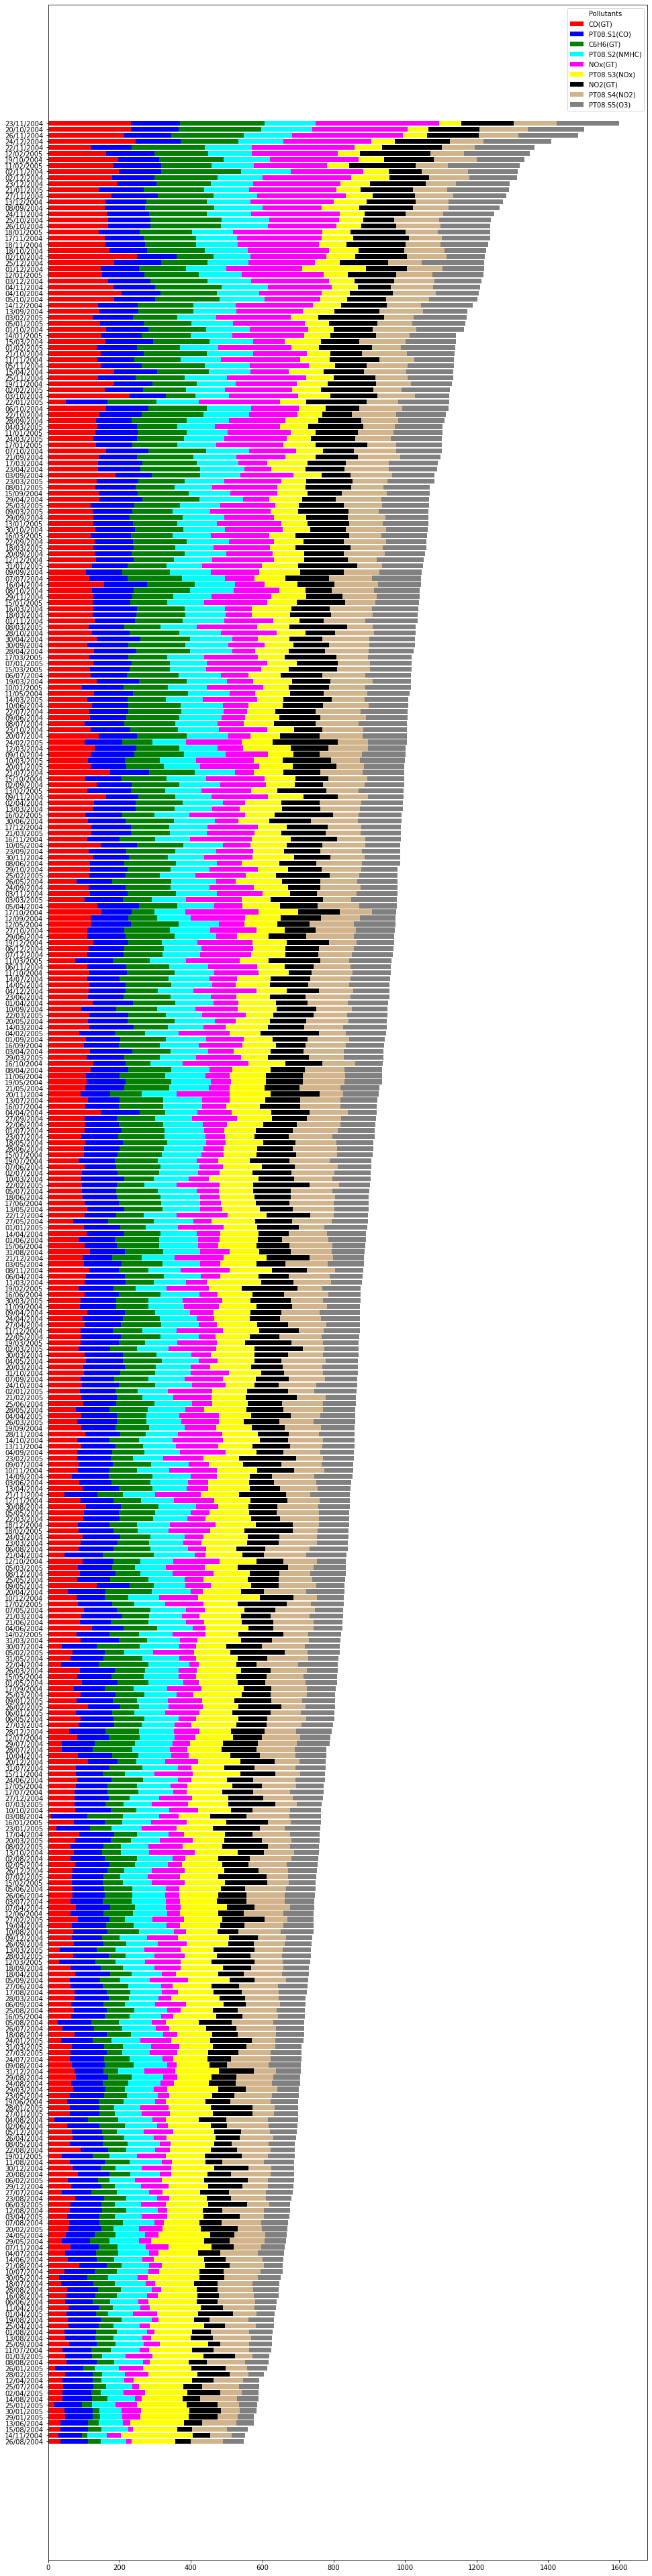

In [54]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [16, 70]
plt.rcParams["figure.autolayout"] = False

dates = resultDF['Date'].values

total = resultDF['Total%'].values
b1 = plt.barh(dates, total, color="yellow")

leftArr = []
listOfBars = []
listOfBarsTitle = []
colors = ["red", "blue", "green", "cyan", "magenta", "yellow", "black", "tan", "grey", "purple", "olive", "pink"]
i = 0

for colName in resultDF.columns:
  if(colName == 'Date' or colName == 'Time' or 
     colName == 'T' or colName == 'RH' or colName == 'AH' or colName == 'Total%'):
    continue
  elementVal = resultDF[colName].values
  if(len(leftArr) > 1):
    listOfBars.append(plt.barh(dates, elementVal, left=leftArr, color=colors[i]))
    leftArr += elementVal
  else:
    listOfBars.append(plt.barh(dates, elementVal, color=colors[i]))
    leftArr = elementVal
  listOfBarsTitle.append(colName)
  i += 1

plt.legend(listOfBars, listOfBarsTitle, title="Pollutants", loc="upper right")
plt.show()

## Process Date column

In [55]:
# Separate year, month, day, hour
dfInput = df.copy()

In [56]:
dfInput['Date'] = pd.to_datetime(dfInput['Date'], format='%d/%m/%Y', errors='coerce')

In [57]:
dfInput.insert(loc=0, column='Year', value=dfInput["Date"].dt.year)
dfInput.insert(loc=0, column='Month', value=dfInput["Date"].dt.month)
dfInput.insert(loc=0, column='Day', value=dfInput["Date"].dt.day)

In [58]:
dfInput = dfInput.drop(['Date'], axis=1)

In [59]:
dfInput['Time'] = dfInput['Time'].apply(lambda x: x[0:2])
dfInput['Time'] = dfInput['Time'].astype(int)

In [60]:
dfInput

Day  Month  Year  Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0      10      3  2004    18     2.6       1360.0      11.9         1046.0   
1      10      3  2004    19     2.0       1292.0       9.4          955.0   
2      10      3  2004    20     2.2       1402.0       9.0          939.0   
3      10      3  2004    21     2.2       1376.0       9.2          948.0   
4      10      3  2004    22     1.6       1272.0       6.5          836.0   
...   ...    ...   ...   ...     ...          ...       ...            ...   
9352    4      4  2005    10     3.1       1314.0      13.5         1101.0   
9353    4      4  2005    11     2.4       1163.0      11.4         1027.0   
9354    4      4  2005    12     2.4       1142.0      12.4         1063.0   
9355    4      4  2005    13     2.1       1003.0       9.5          961.0   
9356    4      4  2005    14     2.2       1071.0      11.9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0       166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1       103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2       131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3       172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4       131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   
...       ...           ...      ...           ...          ...   ...   ...   
9352    472.0         539.0    190.0        1374.0       1729.0  21.9  29.3   
9353    353.0         604.0    179.0        1264.0       1269.0  24.3  23.7   
9354    293.0         603.0    175.0        1241.0       1092.0  26.9  18.3   
9355    235.0         702.0    156.0        1041.0        770.0  28.3  13.5   
9356    265.0         654.0    168.0        1129.0        816.0  28.5  13.1   

          AH  
0     0.7578  
1     0.7255  
2     0.7502  
3     0.7867  
4     0.7888  
...      ...  
9352  0.7568  
9353  0.7119  
9354  0.6406  
9355  0.5139  
9356  0.5028  

[8991 rows x 16 columns]

## XGBoost Part

In [61]:
!pip install -Uqq ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.8/775.8 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 KB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 8.8.0 which is incompatible.


In [62]:
import ipdb

%pdb off

Automatic pdb calling has been turned OFF


In [63]:
import sys
sys.version
#Import Libraries
import itertools
import pandas as pd
import numpy as np
import os
#import matplotlib
#import matplotlib.pyplot as plt
import random
# %matplotlib inline
import shutil
import xgboost as xgb

from random import shuffle
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [64]:
num_periods_output = 12 #to predict
num_periods_input= 2 * 24 #input

In [65]:
def preprocessing(df_, target_col_name, num_features, train_portion_ratio, isNormalized):
  
    cols=df_.columns
    targetColIdx=df_.columns.get_loc(target_col_name)
    # ipdb.set_trace()
    split_index = int((df_[df_.columns[0]].count() - 1) * train_portion_ratio)

    Train=df_[:split_index]
    Test=df_[split_index:]

    Train=Train.fillna(Train.mean())
    Test=Test.fillna(Test.mean())
    ################################################encoding########################
    Train=Train[['Day', 'Month', 'Year', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
    
    Train=Train.values
    Train = Train.astype('float32')
    #################################################################################
    
    Test=Test[['Day', 'Month', 'Year', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
    Test=Test.values
    Test = Test.astype('float32')
    #################################################################################
    Number_Of_Features=num_features
    split=num_periods_output+num_periods_input
        
    #############################  Normalization on training #############
    ColTarget_Train=Train[:,targetColIdx]
    # ipdb.set_trace()
    Train=np.delete(Train,[targetColIdx],1)
    # ipdb.set_trace()

    #normalizing data
    Train = Train.astype('float32')
    normalizer = MinMaxScaler().fit(Train)
    if(isNormalized):
      Train=normalizer.transform(Train)

    ColTarget_Train=np.reshape(ColTarget_Train,(len(ColTarget_Train),1))
    Train=np.append(ColTarget_Train,Train, axis=1)
    ############################################ TRAIN windows ##################################
    
    end=len(Train)
    start=0
    next=0
    x_batches=[]
    y_batches=[]
    
    count=0
    #print('len',len(Train))
    limit=num_periods_output+num_periods_input
    while start+(limit)<=end:
        next=start+num_periods_input
        x_batches.append(Train[start:next,:])
        y_batches.append(Train[next:next+num_periods_output,0])
        start=start+1
    x_batches=np.asarray(x_batches)

    x_batches = x_batches.reshape(-1, num_periods_input, Number_Of_Features)
    y_batches=np.asarray(y_batches)
    y_batches = y_batches.reshape(-1, num_periods_output, 1)
    
    ###########################################TEST normalization#####################################
    ColTarget_Test=Test[:,targetColIdx]
    # ipdb.set_trace()
    Test=np.delete(Test,[targetColIdx],1)
    # ipdb.set_trace()

    Test = Test.astype('float32')
    if(isNormalized):
      Test=normalizer.transform(Test) 

    ColTarget_Test=np.reshape(ColTarget_Test,(len(ColTarget_Test),1))
    Test=np.append(ColTarget_Test,Test, axis=1)
    #------------------
    ############################################ TEST windows ##################################
    end_test=len(Test)
    start_test=0
    next_test=0
    x_testbatches=[]
    y_testbatches=[]
    
    #print('len',len(Train))
    while start_test+(limit)<=end_test:
        next_test=start_test+num_periods_input
        x_testbatches.append(Test[start_test:next_test,:])
        y_testbatches.append(Test[next_test:next_test+num_periods_output,0])
        # ipdb.set_trace()
        start_test=start_test+num_periods_output
    x_testbatches=np.asarray(x_testbatches)
    #print('x-------------',len(x_testbatches))

    x_testbatches = x_testbatches.reshape(-1, num_periods_input, Number_Of_Features)
    y_testbatches=np.asarray(y_testbatches)

    y_testbatches = y_testbatches.reshape(-1, num_periods_output, 1) 
    # ipdb.set_trace()
    return x_batches, y_batches, x_testbatches, y_testbatches

In [66]:
def generate_result(dfInput, column_name, num_of_features, train_ratio, isNormalized):
  x_batches_Full, y_batches_Full,X_Test_Full,Y_Test_Full=preprocessing(dfInput, column_name,num_of_features, train_ratio, isNormalized)

  #---------------------shuffle windows X and Y together-------------------------------------
  combined = list(zip(x_batches_Full, y_batches_Full))
  random.shuffle(combined)
  shuffled_batch_features, shuffled_batch_y = zip(*combined)

  All_Training_Instances=[]

  #=============== change each window into Instance =================================
  for i in range(0,len(shuffled_batch_features)):
    hold=[]
    temp=[]
    for j in range(0,len(shuffled_batch_features[i])):
      
      if j==(len(shuffled_batch_features[i])-1):
          hold=np.concatenate((hold, shuffled_batch_features[i][j][:]), axis=None)
          
      else:
          hold=np.concatenate((hold, shuffled_batch_features[i][j][0]), axis=None)          
    All_Training_Instances.append(hold)

  All_Testing_Instances=[]

  #=============== change each testing window into Instance =================================
  for i in range(0,len(X_Test_Full)):
    hold=[]
    temp=[]
    for j in range(0,len(X_Test_Full[i])):
        if j==(len(X_Test_Full[i])-1):
            hold=np.concatenate((hold, X_Test_Full[i][j][:]), axis=None)
        else:
            hold=np.concatenate((hold, X_Test_Full[i][j][0]), axis=None)
    
    All_Testing_Instances.append(hold)

  #===========================calling MultiOutput XGoost=========================
  All_Testing_Instances=np.reshape(All_Testing_Instances, (len(All_Testing_Instances),len(All_Testing_Instances[0])))
  Y_Test_Full=np.reshape(Y_Test_Full, (len(Y_Test_Full),num_periods_output))

  #========== reshape train ==============================
  All_Training_Instances=np.reshape(All_Training_Instances, (len(All_Training_Instances),len(All_Training_Instances[0])))
  shuffled_batch_y=np.reshape(shuffled_batch_y, (len(shuffled_batch_y),num_periods_output))

  model=xgb.XGBRegressor(learning_rate =0.025,
    n_estimators=250,
    max_depth=2,
    min_child_weight=1,
    gamma=0.0,
    subsample=0.98,
    colsample_bytree=0.98,
    scale_pos_weight=0.8,
    seed=42,silent=False,
    verbosity = 0)
  
  multioutput=MultiOutputRegressor(model).fit(All_Training_Instances,shuffled_batch_y)

  prediction=multioutput.predict(All_Testing_Instances)
  print('Predict Done! ' + column_name)

  MSE=np.mean(( prediction- Y_Test_Full)**2)
  MAE=np.mean(np.abs( prediction- Y_Test_Full)) 

  return MSE, MAE, Y_Test_Full, prediction

In [67]:
dfInput.columns

Index(['Day', 'Month', 'Year', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [71]:
target_features = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

# target_features = ['CO(GT)', 'PT08.S1(CO)']

RMSE_Arr = []
MAE_Arr = []
Y_Test_Arr = []
Prediction_Arr = []

for i in range(0, len(target_features)):
  RMSE_result, MAE_result, Y_Test_result, Prediction_result = generate_result(dfInput, target_features[i], 16, 0.7, False)
  RMSE_Arr.append(RMSE_result)
  MAE_Arr.append(MAE_result)
  Y_Test_Arr.append(Y_Test_result)
  Prediction_Arr.append(Prediction_result)

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! CO(GT)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! PT08.S1(CO)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! C6H6(GT)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! PT08.S2(NMHC)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! NOx(GT)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! PT08.S3(NOx)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! NO2(GT)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! PT08.S4(NO2)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! PT08.S5(O3)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! T


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! RH


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


Predict Done! AH


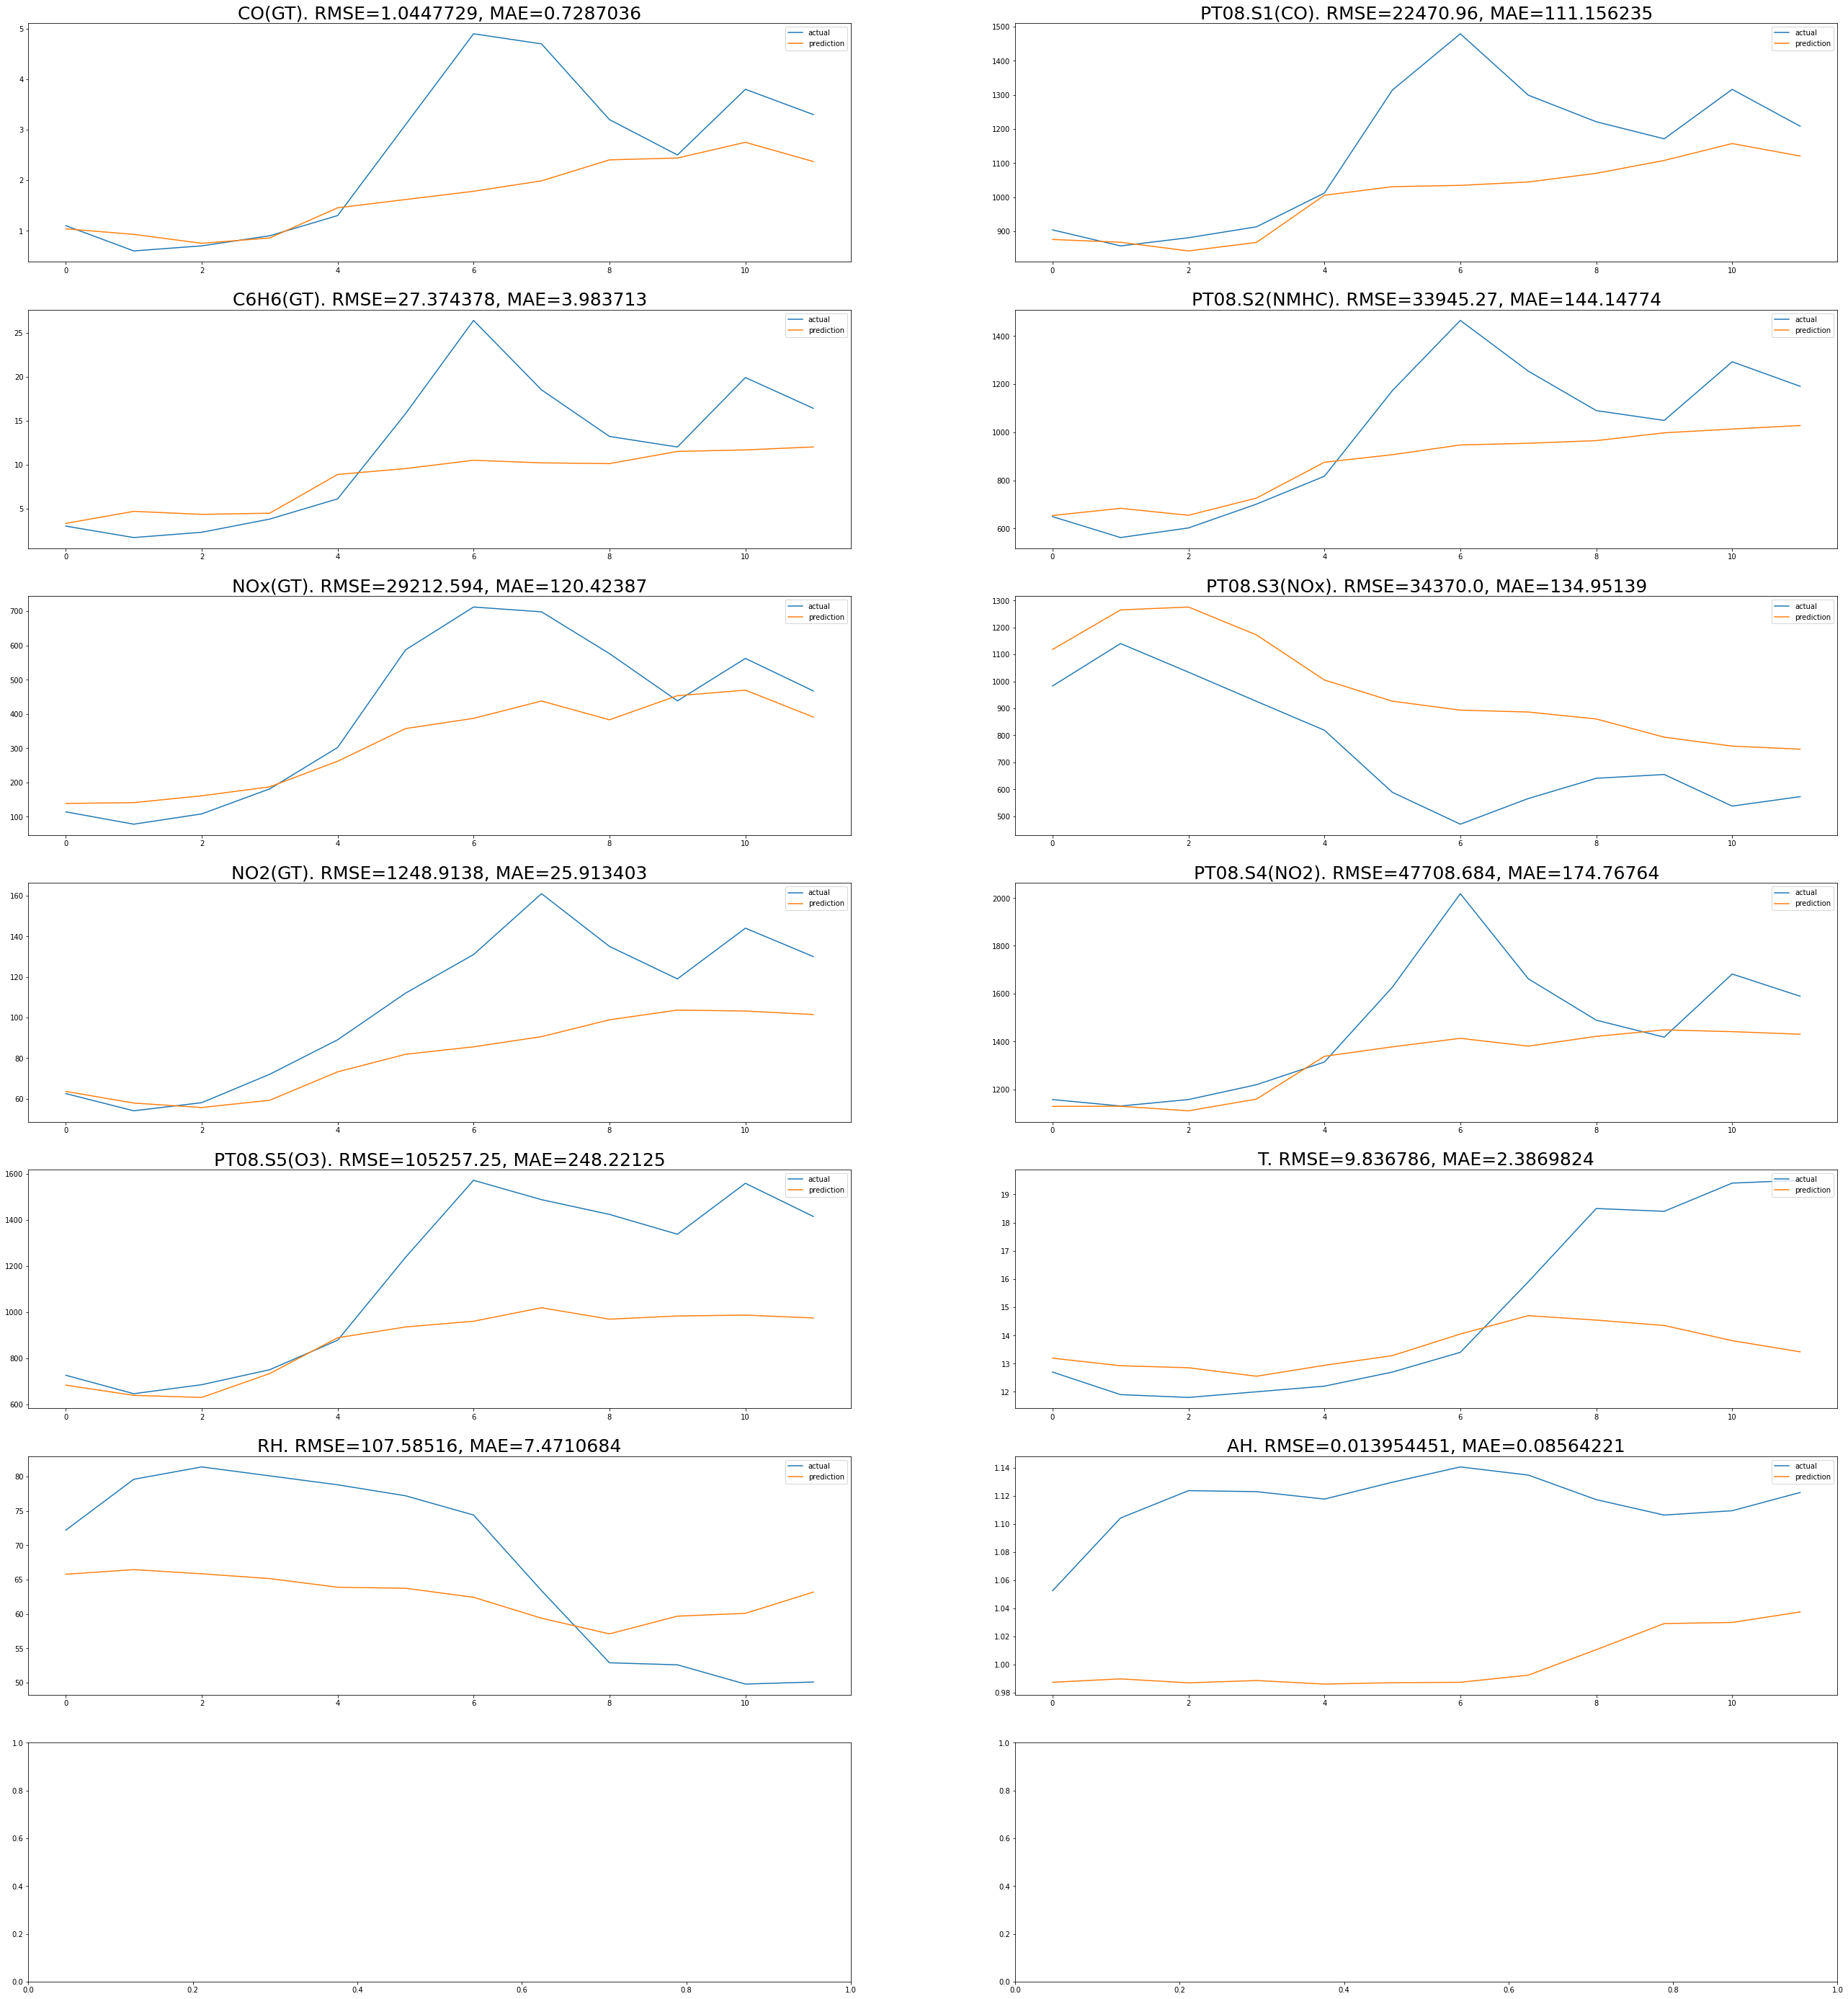

In [72]:
fig, axs = plt.subplots(7, 2, figsize=(45,50))

x = []
for i in range(0, num_periods_output):
  x.append(i)

colGrid = -1
rowGrid = 0

for i in range(0, len(target_features)):
  colGrid += 1
  if(colGrid == 2):
    colGrid = 0
    rowGrid += 1
    
  axs[rowGrid, colGrid].plot(x, Y_Test_Arr[i][0], label="actual")
  axs[rowGrid, colGrid].plot(x, Prediction_Arr[i][0], label="prediction")
  axs[rowGrid, colGrid].legend(loc="upper right")
  axs[rowGrid, colGrid].set_title(target_features[i] + ". RMSE=" + str(RMSE_Arr[i]) + ", MAE=" + str(MAE_Arr[i]), fontsize=25)